## Question 1. (k-means)
### We want to train a k-means model.
#### 1a. We will use the Silhouette coefficient to select the best number of clusters (k) from [1,20]. Foreach k, run k-means 5 times and compute the average Silhouette coefficient across those 5 running times and clusters. Plot the average Silhouette coefficients for different k. Submit the plot. What is the best k?

Answer：
After five times of data, the best k-mean as shown in the calculated graph is 14.

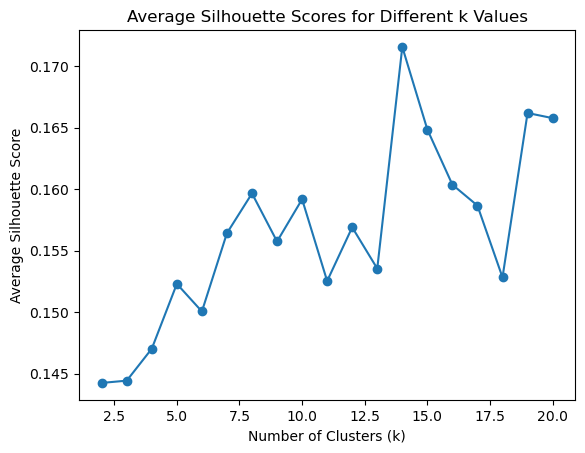

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('google_review_ratings.csv')
data = data.drop(columns=['User'])  # Dropping 'User' column as assumed it's not needed for clustering
data = data.apply(lambda x: x.fillna(x.mean()), axis=0)  # Replacing NaN values with column mean

silhouette_avg_scores = []
k_values = range(2, 21)  # k=1 is not valid for silhouette score, so starting from k=2

for k in k_values:
    silhouette_scores = []
    for _ in range(5):  # Running k-means 5 times
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_avg = silhouette_score(data, cluster_labels)
        silhouette_scores.append(silhouette_avg)
    silhouette_avg_scores.append(sum(silhouette_scores) / len(silhouette_scores))
    
plt.plot(k_values, silhouette_avg_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Scores for Different k Values')
plt.show()


#### 1b.  Train a k-means model with the best k above. Report the centroids of clusters.

Centroids of clusters:
[[1.8569697  2.10969697 2.60323232 3.81722222 3.78434343 2.76944444
  3.28823232 2.99383838 3.75434343 3.46969697 4.33252525 1.81136364
  4.9490404  2.38808081 1.62863636 1.04909091 0.89212121 0.76712121
  0.68868687 0.67691919 0.69040404 4.21616162 2.84838384 1.69616162]
 [1.12216949 2.64827119 2.31430508 2.21630508 2.48130508 3.35274576
  4.63555932 3.18383051 4.59445763 3.46184746 2.22474576 1.90489831
  2.06525424 2.94020339 4.92218644 0.73059322 0.63044068 0.63313559
  0.67250847 0.78581356 0.84916949 0.91862712 0.93527119 1.04315254]
 [1.36884127 3.64284127 4.24233333 4.09746032 4.39461905 3.70784127
  3.24180952 2.34419048 2.70725397 2.71403175 2.13550794 1.81411111
  1.68914286 1.53403175 1.60926984 1.38406349 0.5738254  0.33957143
  0.35396825 0.61361905 0.78333333 0.85192063 0.98730159 1.10515873]
 [1.33905797 3.29373188 2.47818841 2.27221014 2.8782971  3.47206522
  4.43427536 3.33282609 3.64775362 2.85605072 2.57391304 2.3351087
  2.54605072 4.72177536

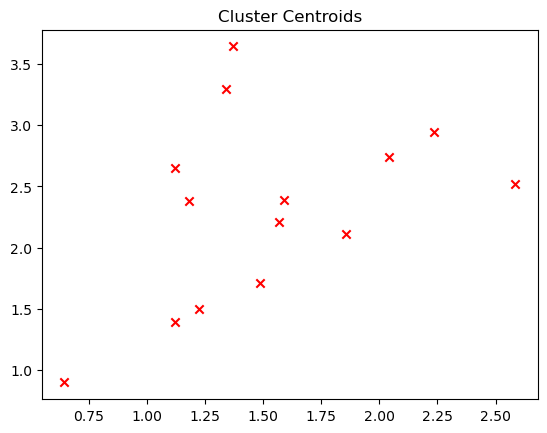

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Load and preprocess the data (assuming it has been preprocessed as in task 1a)
data = pd.read_csv('google_review_ratings.csv', header='infer')
data = data.dropna()
data = data.drop(columns=['User'])  # Assuming 'User' column is not necessary for clustering

# Train a k-means model with k=14
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(data)

# Report the centroids of clusters
centroids = kmeans.cluster_centers_
print(f'Centroids of clusters:\n{centroids}')


# If needed, you can plot the centroids to visualize them
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
plt.title('Cluster Centroids')
plt.show()


#### 1c.  Project the data using PCA with two principal components.  From the projected data, draw a scatter plot using cluster IDs as labels (legends).  Are the found clusters well separated in the visualization?  Is that observation consistent with the computed Silhouette coefficient?
##### Answer:
##### Are the found clusters well separated in the visualization?

Not entirely. Several clusters, particularly in the central region of the plot, show considerable overlap with neighboring clusters. This indicates that these data points may have similarities making them hard to distinctly cluster. However, some clusters, especially towards the peripheries (like the top-left and top-right), appear to be more distinct and separated from others.

##### Is that observation consistent with the computed Silhouette coefficient?

Yes,The overlaps and proximity of data points to neighboring clusters would explain a moderate to low Silhouette score, suggesting that many data points might be near the decision boundaries of adjacent clusters.

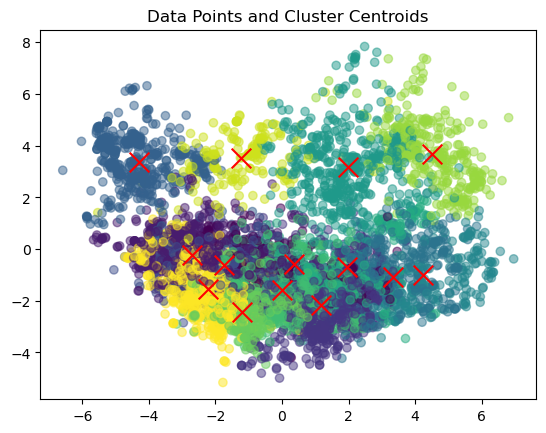

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('google_review_ratings.csv', header='infer')
data = data.dropna()
data = data.drop(columns=['User'])  # Assuming 'User' column is not necessary for clustering

# Train a k-means model with k=14
kmeans = KMeans(n_clusters=14, random_state=42)
kmeans.fit(data)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Report the centroids of clusters
centroids = kmeans.cluster_centers_

# Reduce data dimensions for plotting (if necessary)
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)
centroids_2d = pca.transform(centroids)

# Plot the data points and centroids
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)  # Plot data points
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], marker='x', color='red', s=200)  # Plot centroids

plt.title('Data Points and Cluster Centroids')
plt.show()


### Question 2.
(Gaussian Mixture Model and Spectral Clustering) Perform the tasks in Question 1 with Gaussian Mixture Model and Spectral Clustering.   Draw a plot that includes the average Silhouette coefficients across different k of all the three methods in Questions 1,2.   Submit the plot.   Which method is better in terms of the average Silhouette coefficient?

#### Answer:
Based on the provided plot:

The KMeans method (represented in blue) consistently shows the highest Silhouette scores across all values of 'k'. Its scores are relatively stable and generally remain around the 0.16 mark, which is higher than the other two methods.

GMM (represented in orange) has significantly lower Silhouette scores compared to KMeans. Its scores fluctuate more, especially between k=2 and k=7.5.

Spectral Clustering (represented in green) has scores that are higher than GMM but lower than KMeans. Its scores also show some fluctuation but are more stable than GMM after k=7.5.

In conclusion, based on the average Silhouette coefficient, the KMeans method is the best among the three for this particular dataset.

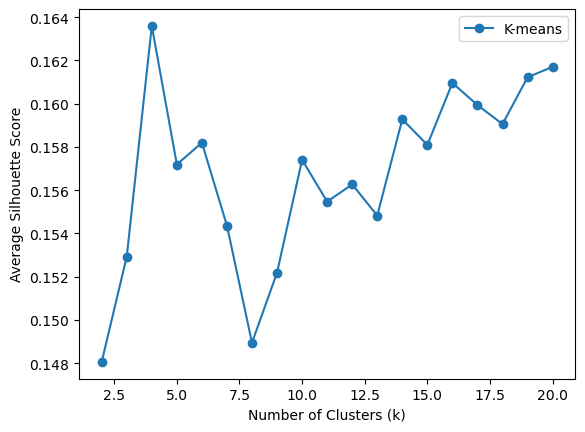

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

# Load and preprocess the data
data = pd.read_csv('google_review_ratings.csv', header='infer')
data = data.dropna()
data = data.drop(columns=['User'])  # Assuming 'User' column is not necessary for clustering

# Apply MinMaxScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

kmeans_sil_scores = []

for k in range(2, 21):
    scores_temp = []
    for run in range(5):  # Running K-means 5 times
        kmeans = KMeans(n_clusters=k, random_state=42+run)
        kmeans_labels = kmeans.fit_predict(data_scaled)
        score = silhouette_score(data_scaled, kmeans_labels)
        scores_temp.append(score)
    kmeans_sil_scores.append(sum(scores_temp) / len(scores_temp))

plt.plot(range(2, 21), kmeans_sil_scores, label='K-means', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.legend()
plt.show()


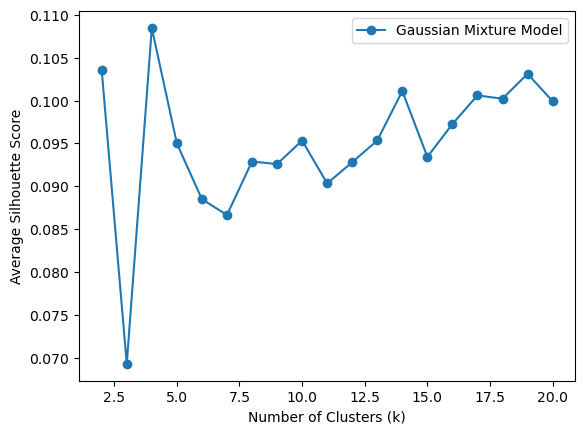

In [5]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

gmm_sil_scores = []

for k in range(2, 21):
    scores_temp = []
    for run in range(5):  # Running GMM 5 times
        gmm = GaussianMixture(n_components=k, random_state=42+run)
        gmm_labels = gmm.fit_predict(data_scaled)
        score = silhouette_score(data_scaled, gmm_labels)
        scores_temp.append(score)
    gmm_sil_scores.append(sum(scores_temp) / len(scores_temp))

plt.plot(range(2, 21), gmm_sil_scores, label='Gaussian Mixture Model', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.legend()
plt.show()


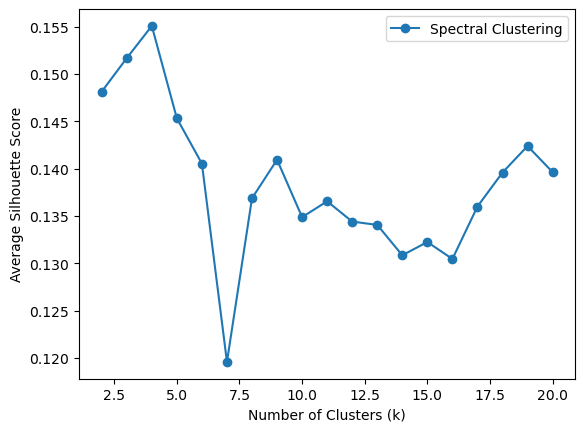

In [6]:
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt

sc_sil_scores = []

for k in range(2, 21):
    scores_temp = []
    for run in range(5):  # Running Spectral Clustering 5 times
        sc = SpectralClustering(n_clusters=k, random_state=42+run)
        sc_labels = sc.fit_predict(data_scaled)
        score = silhouette_score(data_scaled, sc_labels)
        scores_temp.append(score)
    sc_sil_scores.append(sum(scores_temp) / len(scores_temp))

plt.plot(range(2, 21), sc_sil_scores, label='Spectral Clustering', marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.legend()
plt.show()


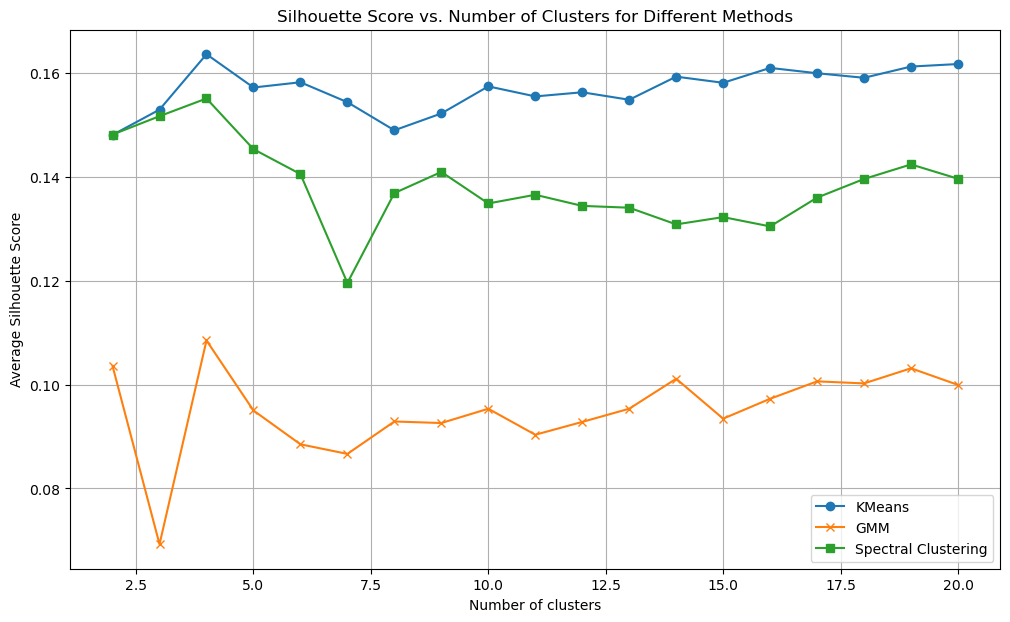

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 7))
plt.plot(range(2, 21), kmeans_sil_scores, marker='o', label='KMeans')
plt.plot(range(2, 21), gmm_sil_scores, marker='x', label='GMM')
plt.plot(range(2, 21), sc_sil_scores, marker='s', label='Spectral Clustering')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters for Different Methods')
plt.legend()
plt.grid(True)
plt.show()


## Question 3. (DBSCAN)
### Perform the clustering with DBSCAN and compute its Silhouette coefficient.
 

Silhouette Coefficient: -0.32950965924828735


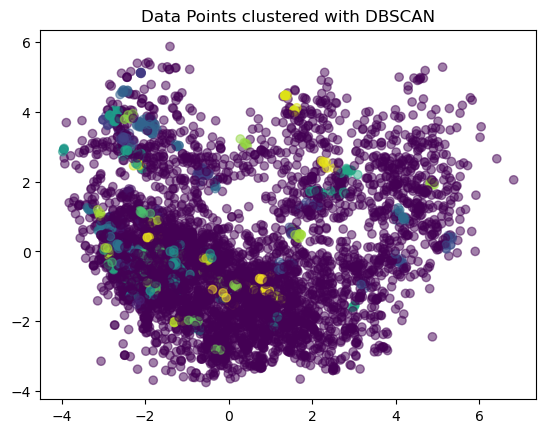

In [25]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Load and preprocess the data
data = pd.read_csv('google_review_ratings.csv', header='infer')
data = data.dropna()
data = data.drop(columns=['User'])  # Assuming 'User' column is not necessary for clustering

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(data_scaled)

# Reduce data dimensions for plotting
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_scaled)

# Compute Silhouette Coefficient
sil_coef = silhouette_score(data_scaled, labels, metric='euclidean')
print(f'Silhouette Coefficient: {sil_coef}')


# Plot the data points
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=labels, cmap='viridis', alpha=0.5)

plt.title('Data Points clustered with DBSCAN')
plt.show()
